In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [2]:
dataset = "crimes"

{'1': [2, 0.2576643912970915], '2': [22, 0.4340368074468711], '3': [128, 0.5669605834329359], '4': [820, 0.6190911334429616], '5': [4458, 0.6348779795959367], '6': [20301, 0.6445663026590511], '7': [79221, 0.6452258568770386], '8': [232067, 0.6521627932181986], '9': [419790, 0.6534378870953113], '10': [529244, 0.6479080347318611], '11': [545403, 0.6372355672980758], '12': [546625, 0.6343898633076159]}


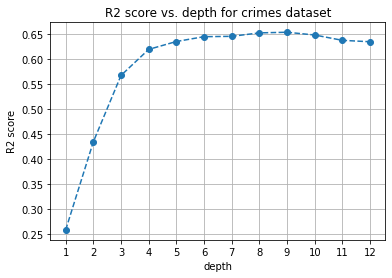

In [3]:
with open(f"../random_forest_builder/scores_{dataset}.json", "r") as f:
    data = json.loads(f.read())
    print(data)
x, y = [], []
for depth, [k, r2] in data.items():
    x.append(depth)
    y.append(r2)
fig, ax = plt.subplots()
ax.set_ylabel("R2 score")
ax.set_xlabel("depth")
ax.plot(x, y, "--o")
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_title(f"R2 score vs. depth for {dataset} dataset")
plt.savefig(f"plots/{dataset}_R2", dpi=300)
plt.show()


In [4]:
n=40
no_trees=20

In [5]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.1, 1.4, 10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-5,2,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                # print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'], data["C"], data["lambda"], data["optimization_time"]))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")

Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=1e-05.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=0.0001.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=0.001.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=0.01.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=0.1.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=1.0.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=10.0.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.1_lambda=100.0.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.244_lambda=1e-05.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.244_lambda=0.0001.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.244_lambda=0.001.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.244_lambda=0.01.json
Couldn't find results/crimes_n=40_no_trees=20_depth=2_C=0.244

depth 2
depth 3
depth 4


NameError: name 'y1_mse' is not defined

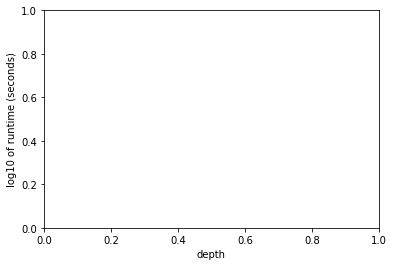

In [6]:
fig, ax = plt.subplots()
ax.set_ylabel("log10 of runtime (seconds)")
ax.set_xlabel("depth")
y1, y2, y3, y4 = [], [], [], []
x = [2,3,4]
for depth in range(2,5):
    print("depth", depth)
    for m, normalized_mse, C, lmbda, time in result_cs[depth]:
        if C==1.4 and lmbda ==0.001:
            y1.append(np.log10(time))
            y1_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.001:
            y2.append(np.log10(time))
            y2_mse = normalized_mse
        if C==1.4 and lmbda ==0.01:
            y3.append(np.log10(time))
            y3_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.01:
            y4.append(np.log10(time))
            y4_mse = normalized_mse
ax.plot(x, y1,'--o', markersize=10, label=f"mse={y1_mse:.6f}")
ax.plot(x, y2,'--o', markersize=10, label=f"mse={y2_mse:.6f}")
ax.plot(x, y3,'--o', markersize=10, label=f"mse={y3_mse:.6f}")
ax.plot(x, y4,'--o', markersize=10, label=f"mse={y4_mse:.6f}")

ax.xaxis.grid()
ax.yaxis.grid()
ax.legend()
ax.set_title(f"Runtime vs depth of CS - {dataset} dataset - n=40")
plt.savefig(f"plots/{dataset}_cs_runtimes", dpi=300)
plt.show()


In [7]:
n=500
no_trees=20

In [8]:
# Reed-solomon method examination
result_reed_solomon = {}
for depth in [2,3,4,5,6]:
    print("depth=", depth)
    result_reed_solomon[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                # print(data)
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                print(data["C"], data["ratio"], normalized_mse, data["measurements"])
                result_reed_solomon[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

depth= 2
0.05 1.1 1.0 0
0.05 2.6 1.0 0
0.05 5.0 1.0 0
Could not find crimes_n=500_no_trees=20_depth=2_C=0.1_ratio=1.1.json
0.1 2.6 1.0 0
0.1 5.0 1.0 0
0.15 1.1 0.07290312625599757 348
0.15 2.6 1.0 0
0.15 5.0 1.0 0
0.2 1.1 0.07290312625599757 348
0.2 2.6 1.0 0
0.2 5.0 1.0 0
0.4 1.1 0.0010213714603513507 696
0.4 2.6 0.020854216725181982 232
0.4 5.0 1.0 0
0.6 1.1 0.0001439381748245873 1392
0.6 2.6 0.008587788541621956 464
0.6 5.0 1.0 0
0.8 1.1 1.1918389752563144e-31 1856
0.8 2.6 6.475458746082724e-05 928
0.8 5.0 1.0 0
depth= 3
0.05 1.1 0.06143369160928135 1128
0.05 2.6 1.0000000000000013 0
0.05 5.0 1.0000000000000013 0
0.1 1.1 0.022634764745711387 2256
0.1 2.6 0.04211436677290012 752
0.1 5.0 1.0000000000000013 0
0.15 1.1 0.004136374882614897 4512
0.15 2.6 0.020917896583906553 1880
0.15 5.0 1.0000000000000013 0
0.2 1.1 0.004136374882614897 4512
0.2 2.6 0.016929715754161634 2256
0.2 5.0 0.020917896583906553 1504
0.4 1.1 0.0007776456566948948 9024
0.4 2.6 0.0045228927907285015 4888
0.4 5.0 0

In [9]:
# Reed solomon one more time after examination
C_ratio_list = {2:[(0.6,1.1)], 3:[(0.1,1.1)], 4:[(0.05, 2.6)], 5:[(0.05, 5.0)]}
result_reed_solomon = {}
for depth in [2, 3, 4, 5, 6]:
    print(depth)
    result_reed_solomon[depth] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                print(data["C"], data["ratio"], data["mse"], normalized_mse, data["measurements"])
                if normalized_mse<0.3:
                    result_reed_solomon[depth].append((data["measurements"], data["mse"],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

2
0.05 1.1 0.06717141713147552 1.0 0
0.05 2.6 0.06717141713147552 1.0 0
0.05 5.0 0.06717141713147552 1.0 0
Could not find crimes_n=500_no_trees=20_depth=2_C=0.1_ratio=1.1.json
0.1 2.6 0.06717141713147552 1.0 0
0.1 5.0 0.06717141713147552 1.0 0
0.15 1.1 0.004897006303930238 0.07290312625599757 348
0.15 2.6 0.06717141713147552 1.0 0
0.15 5.0 0.06717141713147552 1.0 0
0.2 1.1 0.004897006303930238 0.07290312625599757 348
0.2 2.6 0.06717141713147552 1.0 0
0.2 5.0 0.06717141713147552 1.0 0
0.4 1.1 6.860696840944489e-05 0.0010213714603513507 696
0.4 2.6 0.0014008072905973923 0.020854216725181982 232
0.4 5.0 0.06717141713147552 1.0 0
0.6 1.1 9.668531182285602e-06 0.0001439381748245873 1392
0.6 2.6 0.0005768539263661943 0.008587788541621956 464
0.6 5.0 0.06717141713147552 1.0 0
0.8 1.1 8.005751296049222e-33 1.1918389752563144e-31 1856
0.8 2.6 4.349657405507841e-06 6.475458746082724e-05 928
0.8 5.0 0.06717141713147552 1.0 0
3
0.05 1.1 0.003918038074501404 0.06143369160928135 1128
0.05 2.6 0.0637

In [10]:
# Binning method
from math import ceil
result_binning = {}

for depth in [2, 3, 4, 5, 6]:
    found = 0
    not_found = 0
    print("depth=", depth)
    result_binning[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.2 * depth ** 2 , depth ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            found+=1 
                            data = json.loads(f.read())
                            #print(data)
                            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                            if normalized_mse<0.3:
                                result_binning[depth].append((data["measurements"], data["mse"]))
                        except:
                            not_found+=1
                            #print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                            #        f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                            #        f"csratio={cs_ratio}.json")
    print(f"found {found}, not found {not_found}")

depth= 2
found 0, not found 3780
depth= 3
found 3423, not found 357
depth= 4
found 3654, not found 126
depth= 5
found 3717, not found 63
depth= 6
found 0, not found 3780


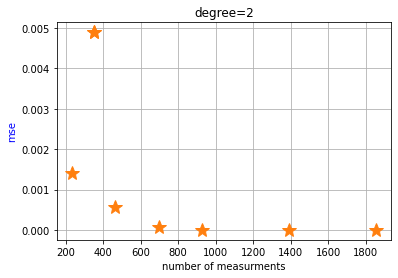

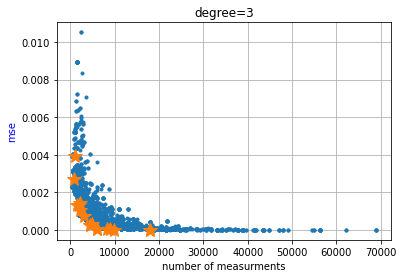

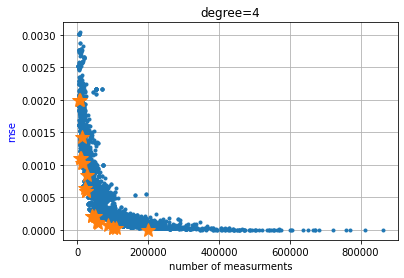

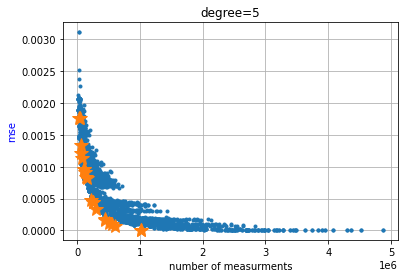

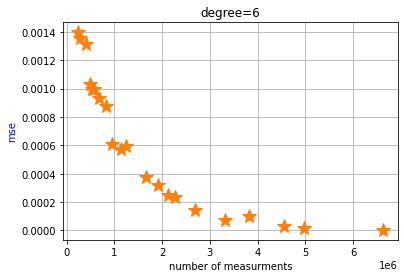

In [11]:
for depth in [2, 3, 4, 5, 6]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [17]:
# Random measurement method
from math import ceil
result_random = {}
for depth in [2,3,4,5]:
    result_random[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4, 0.6, 0.8]:
        for ratio in [1.1, 2.6, 5.0]:
            for sampling_factor in np.linspace(0.2,1.4,10):
                try:
                    dir_string= f"../results/random_parallel/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}_ncores=10.json"
                    f =open(dir_string)
                    data = json.loads(f.read())
                    print(data)
                    normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                    if normalized_mse < 0.4:
                        result_random[depth].append((data["measurements"], data["mse"]))
                except:
                    print(f" Couldn't find {dir_string}")

{'n': 500, 'no_trees': 20, 'depth': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 100, 'k': 22, 'time_uncached': 8.749961853027344e-05, 'time_cached': 1.1682510375976562e-05, 'equality': False, 'mse': 0.06717141713147552, 'true_fourier_norm_squared': 0.06717141713147552, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'no_trees': 20, 'depth': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.33333333333333337, 'n_cores': 10, 'wait_time': 100, 'k': 22, 'time_uncached': 6.842613220214844e-05, 'time_cached': 9.775161743164062e-06, 'equality': False, 'mse': 0.06717141713147552, 'true_fourier_norm_squared': 0.06717141713147552, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'no_trees': 20, 'depth': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.4666666666666667, 'n_cores': 10, 'wait_time': 100, 'k': 22, 'time_uncached': 6.127357482910156e-05, 'time_cached': 1.0251998901367188e-05, 'equality': False, 'mse': 0.06717141713

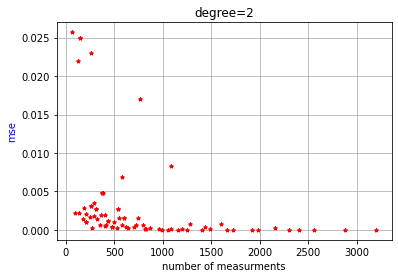

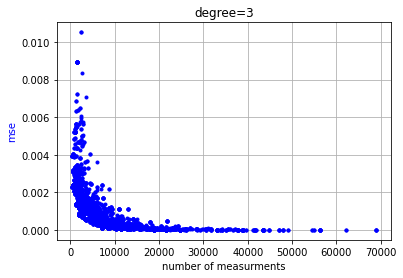

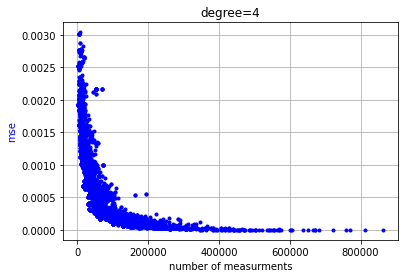

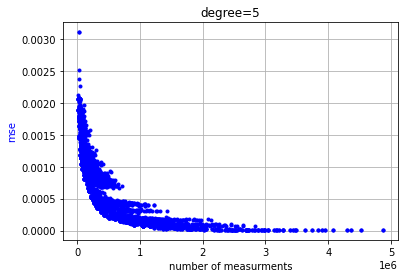

In [16]:
for depth in [2,3,4,5]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'b.')
    ax.plot([a[0] for a in result_random[depth]],[a[1] for a in result_random[depth]],'r*', markersize=4)
    # ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'g*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()